<a href="https://www.kaggle.com/code/albertobircoci/multiple-linear-regression?scriptVersionId=253981068" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


📁 1. Data Loading and Initial Inspection

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


🧹 2. Data Cleaning and Preprocessing

In [4]:
df['CarName'].value_counts().head(10)
df['CarName'].nunique()


147

In [5]:
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df['CarBrand'].value_counts()


CarBrand
toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
mercury         1
porcshce        1
Name: count, dtype: int64

In [6]:
corrections = {
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'maxda': 'mazda'
}

df['CarBrand'] = df['CarBrand'].replace(corrections)

df['CarBrand_cat'] = df['CarBrand'].astype('category').cat.codes

brand_mapping = dict(enumerate(df['CarBrand'].astype('category').cat.categories))
brand_mapping

{0: 'alfa-romero',
 1: 'audi',
 2: 'bmw',
 3: 'buick',
 4: 'chevrolet',
 5: 'dodge',
 6: 'honda',
 7: 'isuzu',
 8: 'jaguar',
 9: 'mazda',
 10: 'mercury',
 11: 'mitsubishi',
 12: 'nissan',
 13: 'peugeot',
 14: 'plymouth',
 15: 'porsche',
 16: 'renault',
 17: 'saab',
 18: 'subaru',
 19: 'toyota',
 20: 'volkswagen',
 21: 'volvo'}

In [7]:
df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [8]:
df['FuelType_cat'] = df['fueltype'].astype('category').cat.codes
fueltype_mapping = dict(enumerate(df['fueltype'].astype('category').cat.categories))
fueltype_mapping


{0: 'diesel', 1: 'gas'}

In [9]:
df['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [10]:
df['Aspiration_cat'] = df['aspiration'].astype('category').cat.codes
aspiration_mapping = dict(enumerate(df['aspiration'].astype('category').cat.categories))
aspiration_mapping


{0: 'std', 1: 'turbo'}

In [11]:
df['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [12]:
df['DoorNumber_cat'] = df['doornumber'].astype('category').cat.codes
doornumber_mapping = dict(enumerate(df['doornumber'].astype('category').cat.categories))
doornumber_mapping


{0: 'four', 1: 'two'}

In [13]:
df['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [14]:
df['CarBody_cat'] = df['carbody'].astype('category').cat.codes
carbody_mapping = dict(enumerate(df['carbody'].astype('category').cat.categories))
carbody_mapping

{0: 'convertible', 1: 'hardtop', 2: 'hatchback', 3: 'sedan', 4: 'wagon'}

In [15]:
df['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [16]:
df['DriveWheel_cat'] = df['drivewheel'].astype('category').cat.codes
drivewheel_mapping = dict(enumerate(df['drivewheel'].astype('category').cat.categories))
drivewheel_mapping

{0: '4wd', 1: 'fwd', 2: 'rwd'}

In [17]:
df['enginelocation'].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [18]:
df['EngineLocation_cat'] = df['enginelocation'].astype('category').cat.codes
enginelocation_mapping = dict(enumerate(df['enginelocation'].astype('category').cat.categories))
enginelocation_mapping

{0: 'front', 1: 'rear'}

In [19]:
df['enginetype'].value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [20]:
df['EngineType_cat'] = df['enginetype'].astype('category').cat.codes
enginetype_mapping = dict(enumerate(df['enginetype'].astype('category').cat.categories))
enginetype_mapping


{0: 'dohc', 1: 'dohcv', 2: 'l', 3: 'ohc', 4: 'ohcf', 5: 'ohcv', 6: 'rotor'}

In [21]:
df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [22]:
word_to_number = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

df['Cylinders'] = df['cylindernumber'].map(word_to_number).astype('int64')


In [23]:
df['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [24]:
df['FuelSystem_cat'] = df['fuelsystem'].astype('category').cat.codes
fuelsystem_mapping = dict(enumerate(df['fuelsystem'].astype('category').cat.categories))
fuelsystem_mapping

{0: '1bbl',
 1: '2bbl',
 2: '4bbl',
 3: 'idi',
 4: 'mfi',
 5: 'mpfi',
 6: 'spdi',
 7: 'spfi'}

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_ID              205 non-null    int64  
 1   symboling           205 non-null    int64  
 2   CarName             205 non-null    object 
 3   fueltype            205 non-null    object 
 4   aspiration          205 non-null    object 
 5   doornumber          205 non-null    object 
 6   carbody             205 non-null    object 
 7   drivewheel          205 non-null    object 
 8   enginelocation      205 non-null    object 
 9   wheelbase           205 non-null    float64
 10  carlength           205 non-null    float64
 11  carwidth            205 non-null    float64
 12  carheight           205 non-null    float64
 13  curbweight          205 non-null    int64  
 14  enginetype          205 non-null    object 
 15  cylindernumber      205 non-null    object 
 16  enginesi

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


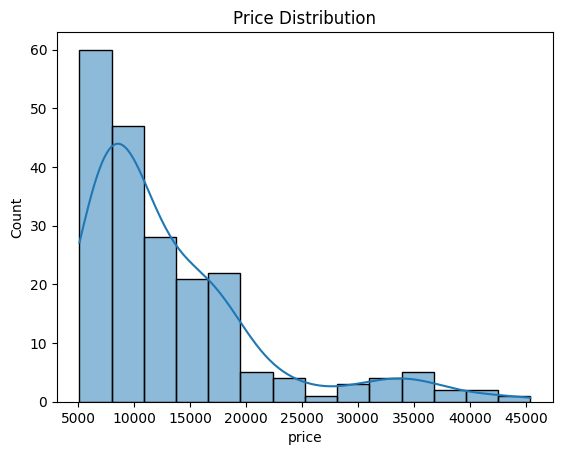

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()


In [27]:
df.drop([
    'car_ID', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
    'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
    'CarBrand'
], axis=1, inplace=True)


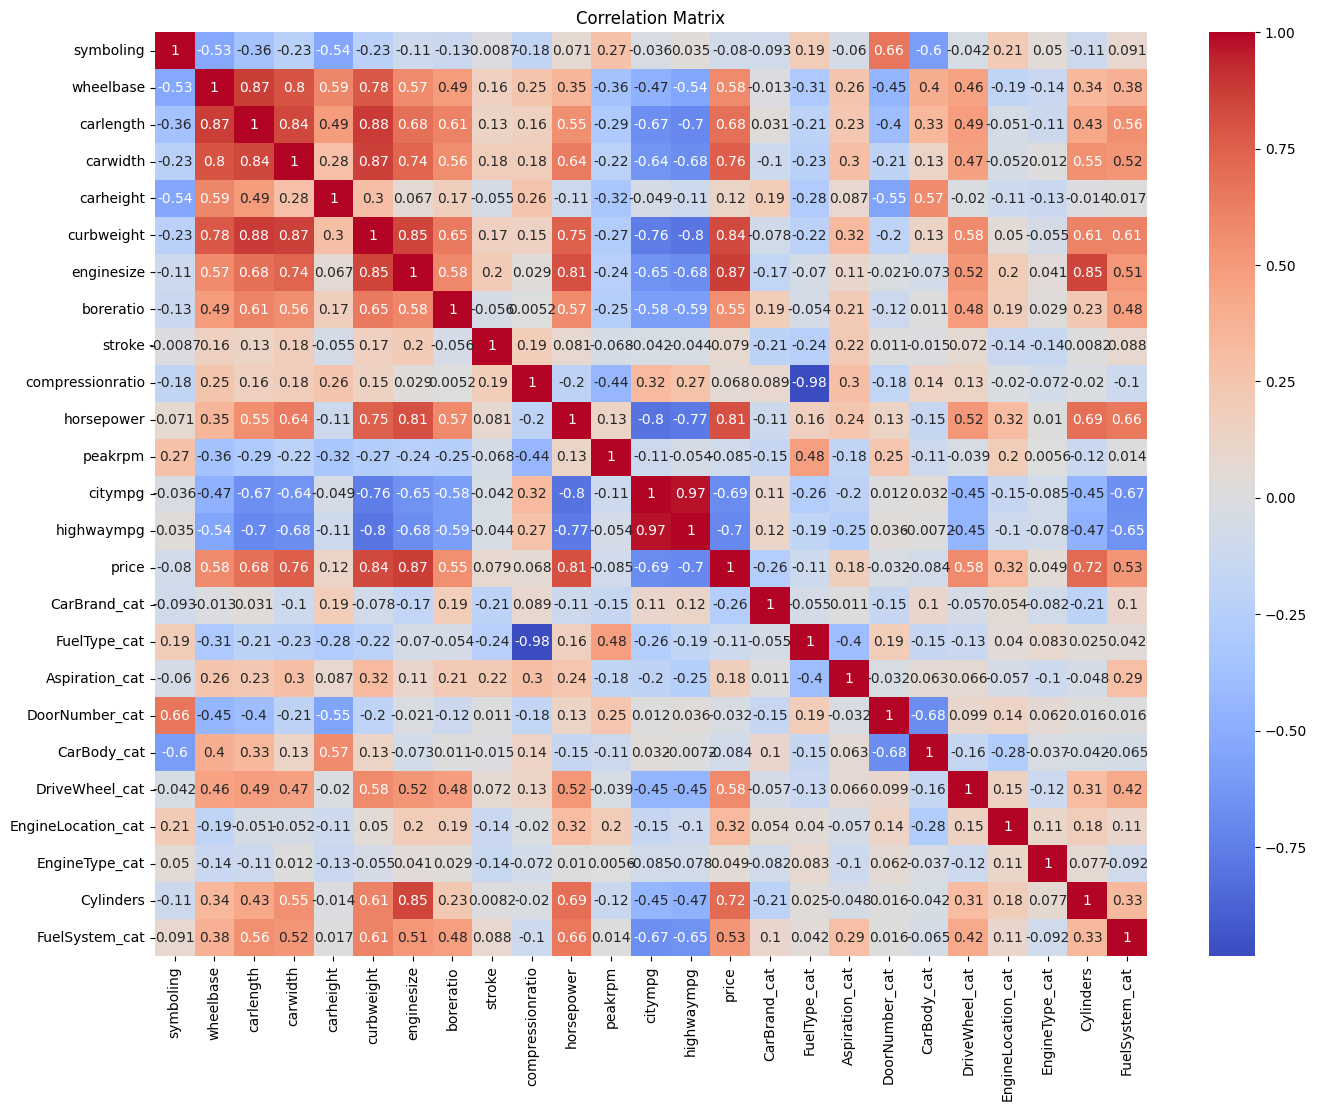

In [28]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

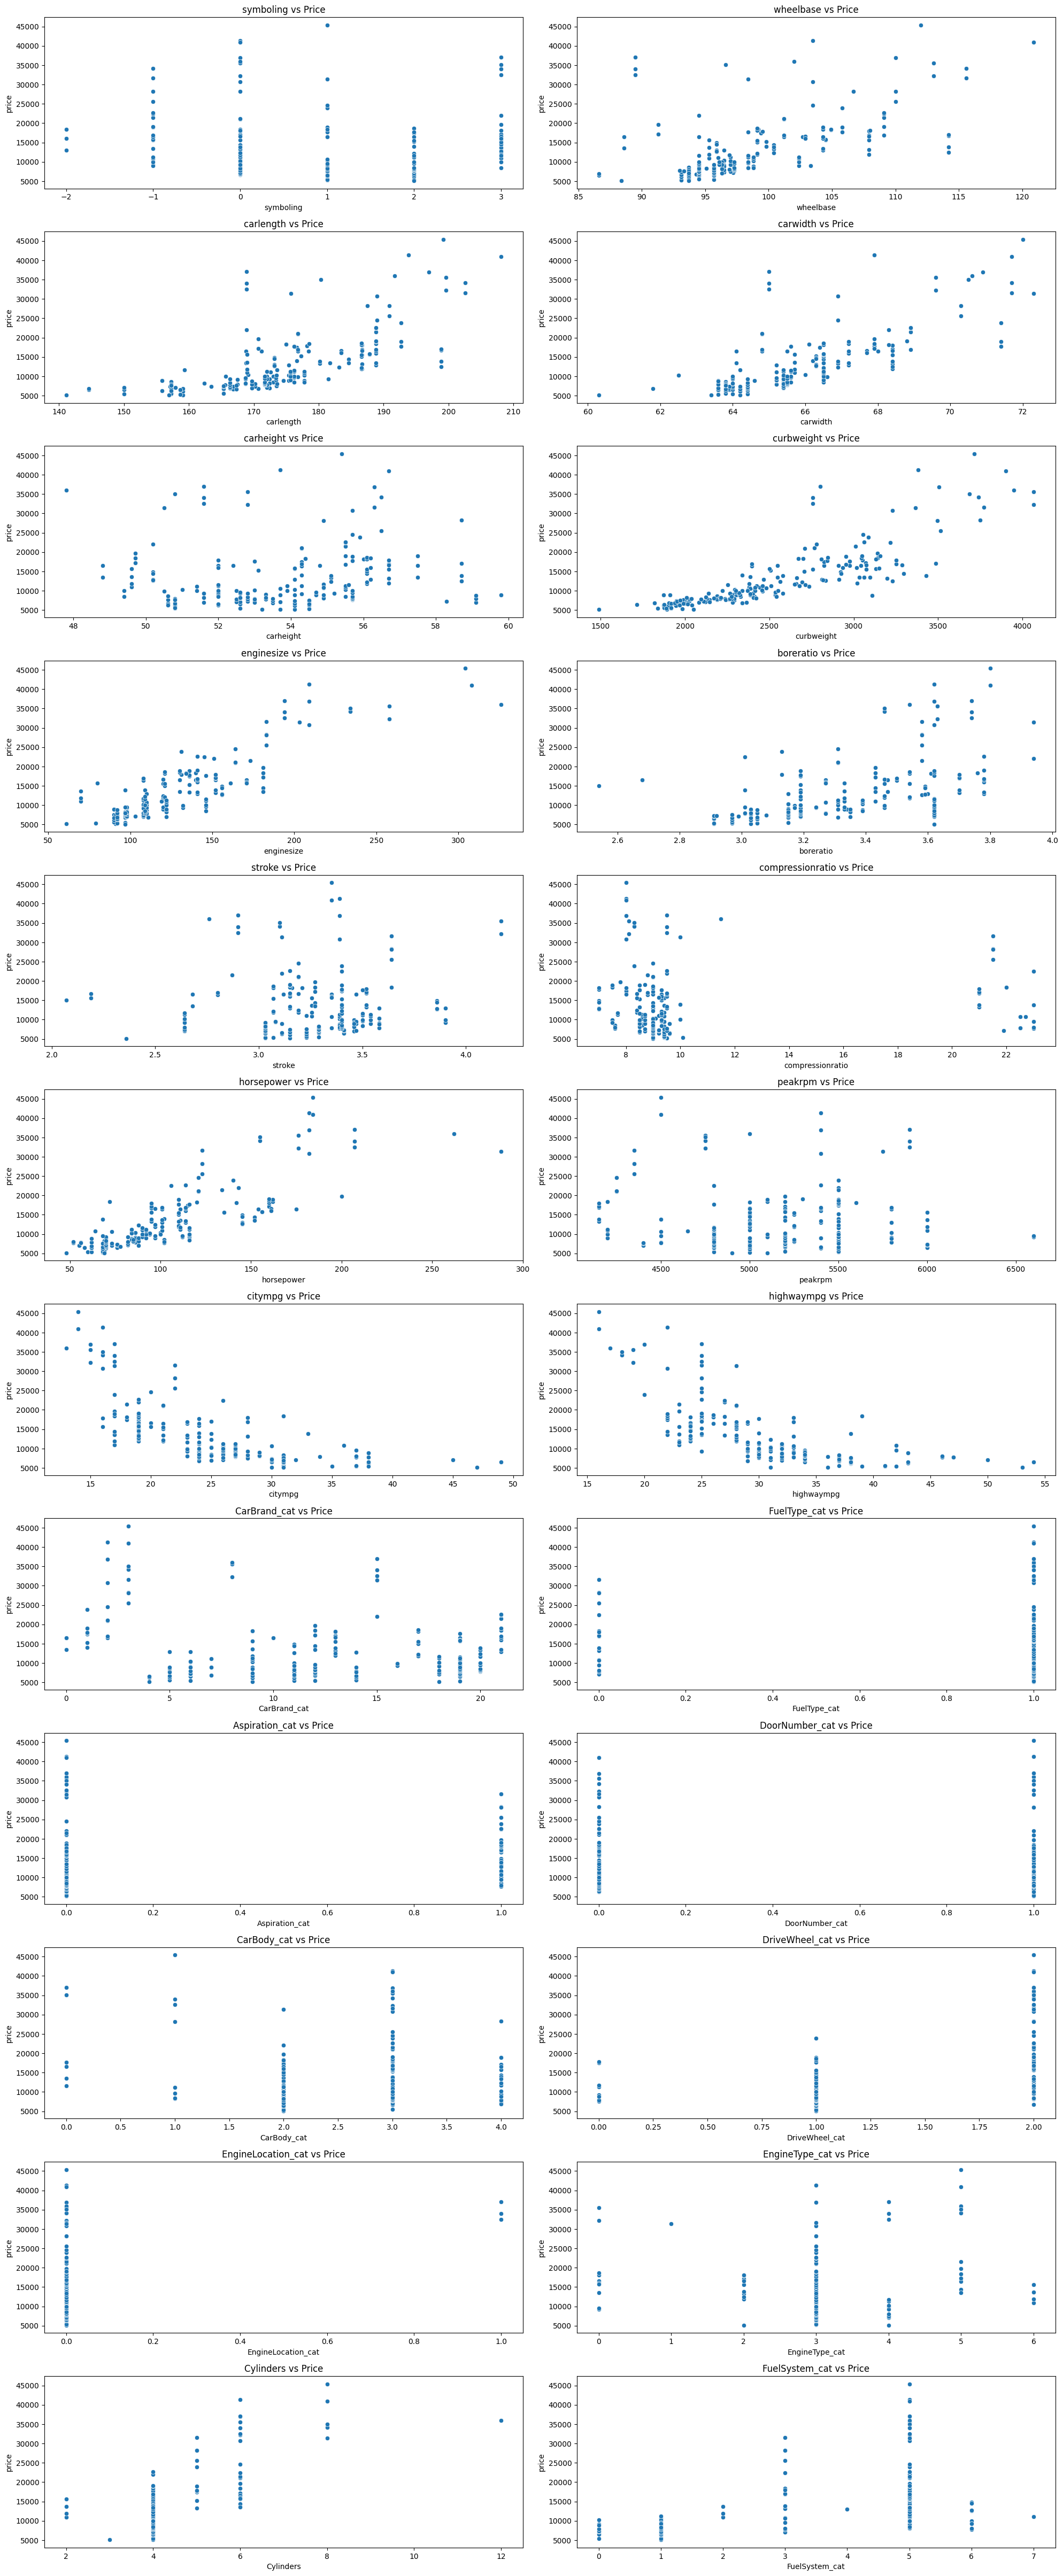

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

features = df.drop('price', axis=1).columns

plt.figure(figsize=(20, len(features) * 4))

for i, col in enumerate(features, 1):
    plt.subplot(len(features), 2, i)
    sns.scatterplot(data=df, x=col, y='price')
    plt.title(f'{col} vs Price')

plt.tight_layout()
plt.show()


🏷️ 3. Categorical Variable Encoding

In [30]:
categorical_cols = [
    'CarBrand_cat',
    'FuelType_cat',
    'Aspiration_cat',
    'DoorNumber_cat',
    'CarBody_cat',
    'DriveWheel_cat',
    'EngineLocation_cat',
    'EngineType_cat',
    'FuelSystem_cat'
]
for col in categorical_cols:
    encoded_col = col.replace('_cat', '_encoded')
    mean_prices = df.groupby(col)['price'].mean()
    df[encoded_col] = df[col].map(mean_prices)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   wheelbase               205 non-null    float64
 2   carlength               205 non-null    float64
 3   carwidth                205 non-null    float64
 4   carheight               205 non-null    float64
 5   curbweight              205 non-null    int64  
 6   enginesize              205 non-null    int64  
 7   boreratio               205 non-null    float64
 8   stroke                  205 non-null    float64
 9   compressionratio        205 non-null    float64
 10  horsepower              205 non-null    int64  
 11  peakrpm                 205 non-null    int64  
 12  citympg                 205 non-null    int64  
 13  highwaympg              205 non-null    int64  
 14  price                   205 non-null    fl

📊 4. Exploratory Data Analysis (EDA)

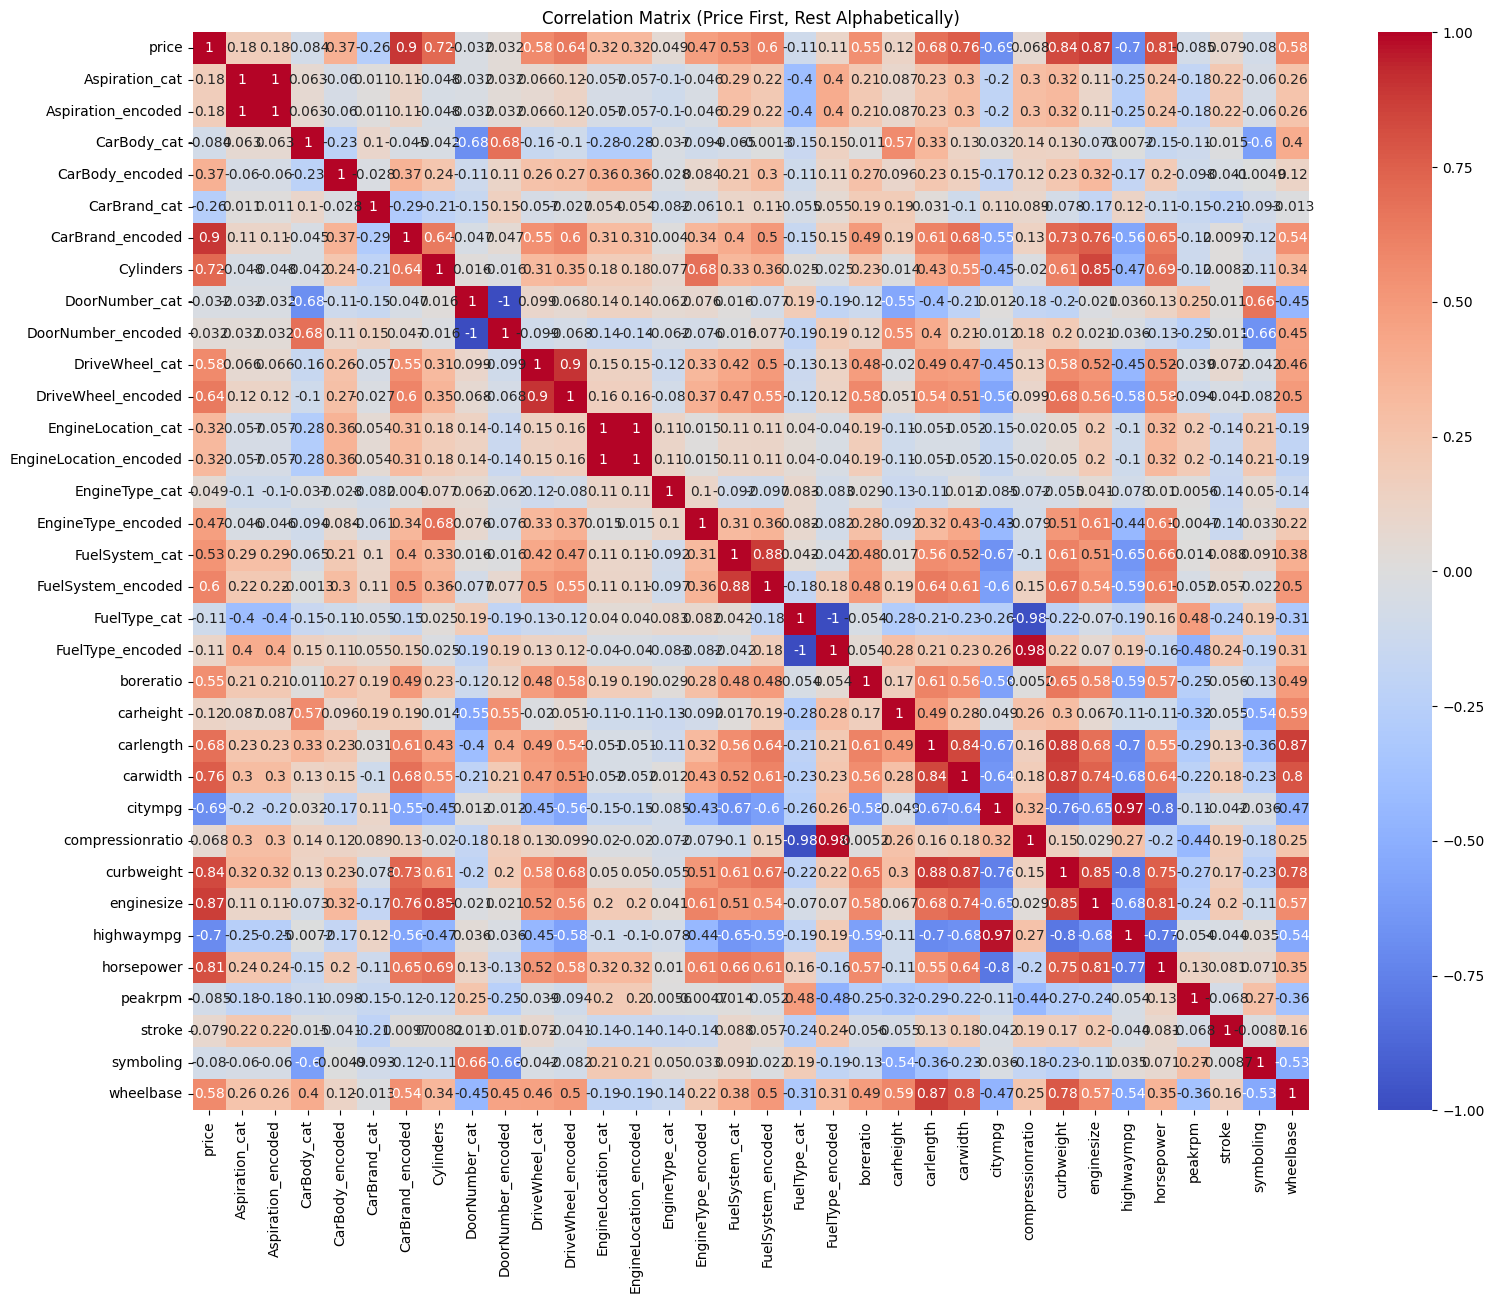

In [31]:
corr_cols = df.columns.tolist()
ordered_cols = ['price'] + sorted([col for col in corr_cols if col != 'price'])
corr_matrix = df[ordered_cols].corr()


plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Price First, Rest Alphabetically)")
plt.show()


🤖 6. Linear Regression Modeling

In [32]:
results_dict = {}
cat_features = [
    'CarBrand_cat', 'FuelType_cat', 'Aspiration_cat', 'DoorNumber_cat',
    'CarBody_cat', 'DriveWheel_cat', 'EngineLocation_cat', 'EngineType_cat', 'FuelSystem_cat'
]

numerical_features = [
    'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
    'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
    'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'Cylinders'
]

features_cat = numerical_features + cat_features
print("Features used in Model 1 (with _cat):")
print(features_cat)
print(len(features))


Features used in Model 1 (with _cat):
['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'Cylinders', 'CarBrand_cat', 'FuelType_cat', 'Aspiration_cat', 'DoorNumber_cat', 'CarBody_cat', 'DriveWheel_cat', 'EngineLocation_cat', 'EngineType_cat', 'FuelSystem_cat']
24


🔹 Model 1: Full Features with Categorical Encoding


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_cat = df[features_cat]
y = df['price']

X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=42)

model_cat = LinearRegression()
model_cat.fit(X_train_cat, y_train)
y_pred_cat = model_cat.predict(X_test_cat)

print("\nModel 1 - Performance (using _cat):")
print("R² Score:", r2_score(y_test, y_pred_cat))
print("RMSE:", mean_squared_error(y_test, y_pred_cat, squared=False))

results_dict['cat_encoding'] = {
    'features': features_cat,
    'r2_score': r2_score(y_test, y_pred_cat),
    'rmse': mean_squared_error(y_test, y_pred_cat, squared=False)
}


Model 1 - Performance (using _cat):
R² Score: 0.8527606284612461
RMSE: 3409.350087782577


🔹 Model 2: Full Features with Mean Encoding


In [34]:
encoded_features = [
    'CarBrand_encoded', 'FuelType_encoded', 'Aspiration_encoded', 'DoorNumber_encoded',
    'CarBody_encoded', 'DriveWheel_encoded', 'EngineLocation_encoded', 'EngineType_encoded',
    'FuelSystem_encoded'
]

features_encoded = numerical_features + encoded_features
print("\nFeatures used in Model 2 (with _encoded):")
print(features_encoded)
print(len(features_encoded))



Features used in Model 2 (with _encoded):
['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'Cylinders', 'CarBrand_encoded', 'FuelType_encoded', 'Aspiration_encoded', 'DoorNumber_encoded', 'CarBody_encoded', 'DriveWheel_encoded', 'EngineLocation_encoded', 'EngineType_encoded', 'FuelSystem_encoded']
24


In [35]:
X_enc = df[features_encoded]

X_train_enc, X_test_enc, _, _ = train_test_split(X_enc, y, test_size=0.2, random_state=42)

model_enc = LinearRegression()
model_enc.fit(X_train_enc, y_train)
y_pred_enc = model_enc.predict(X_test_enc)

print("\nModel 2 - Performance (using _encoded):")
print("R² Score:", r2_score(y_test, y_pred_enc))
print("RMSE:", mean_squared_error(y_test, y_pred_enc, squared=False))

results_dict['mean_encoding'] = {
    'features': features_encoded,
    'r2_score': r2_score(y_test, y_pred_enc),
    'rmse': mean_squared_error(y_test, y_pred_enc, squared=False)
}


Model 2 - Performance (using _encoded):
R² Score: 0.8598311024249576
RMSE: 3326.484086365474


🔹 Model 3: Reduced Features with Categorical Encoding


In [36]:
excluded = ['symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm']

features_cat_reduced = [col for col in features_cat if col not in excluded]
X_cat_reduced = df[features_cat_reduced]

X_train_cat_r, X_test_cat_r, y_train, y_test = train_test_split(X_cat_reduced, y, test_size=0.2, random_state=42)

model_cat_r = LinearRegression()
model_cat_r.fit(X_train_cat_r, y_train)
y_pred_cat_r = model_cat_r.predict(X_test_cat_r)

results_dict['cat_encoding_reduced'] = {
    'features': features_cat_reduced,
    'r2_score': r2_score(y_test, y_pred_cat_r),
    'rmse': mean_squared_error(y_test, y_pred_cat_r, squared=False)
}


🔹 Model 4: Reduced Features with Mean Encoding


In [37]:
features_encoded_reduced = [col for col in features_encoded if col not in excluded]
X_enc_reduced = df[features_encoded_reduced]

X_train_enc_r, X_test_enc_r, _, _ = train_test_split(X_enc_reduced, y, test_size=0.2, random_state=42)

model_enc_r = LinearRegression()
model_enc_r.fit(X_train_enc_r, y_train)
y_pred_enc_r = model_enc_r.predict(X_test_enc_r)

results_dict['mean_encoding_reduced'] = {
    'features': features_encoded_reduced,
    'r2_score': r2_score(y_test, y_pred_enc_r),
    'rmse': mean_squared_error(y_test, y_pred_enc_r, squared=False)
}


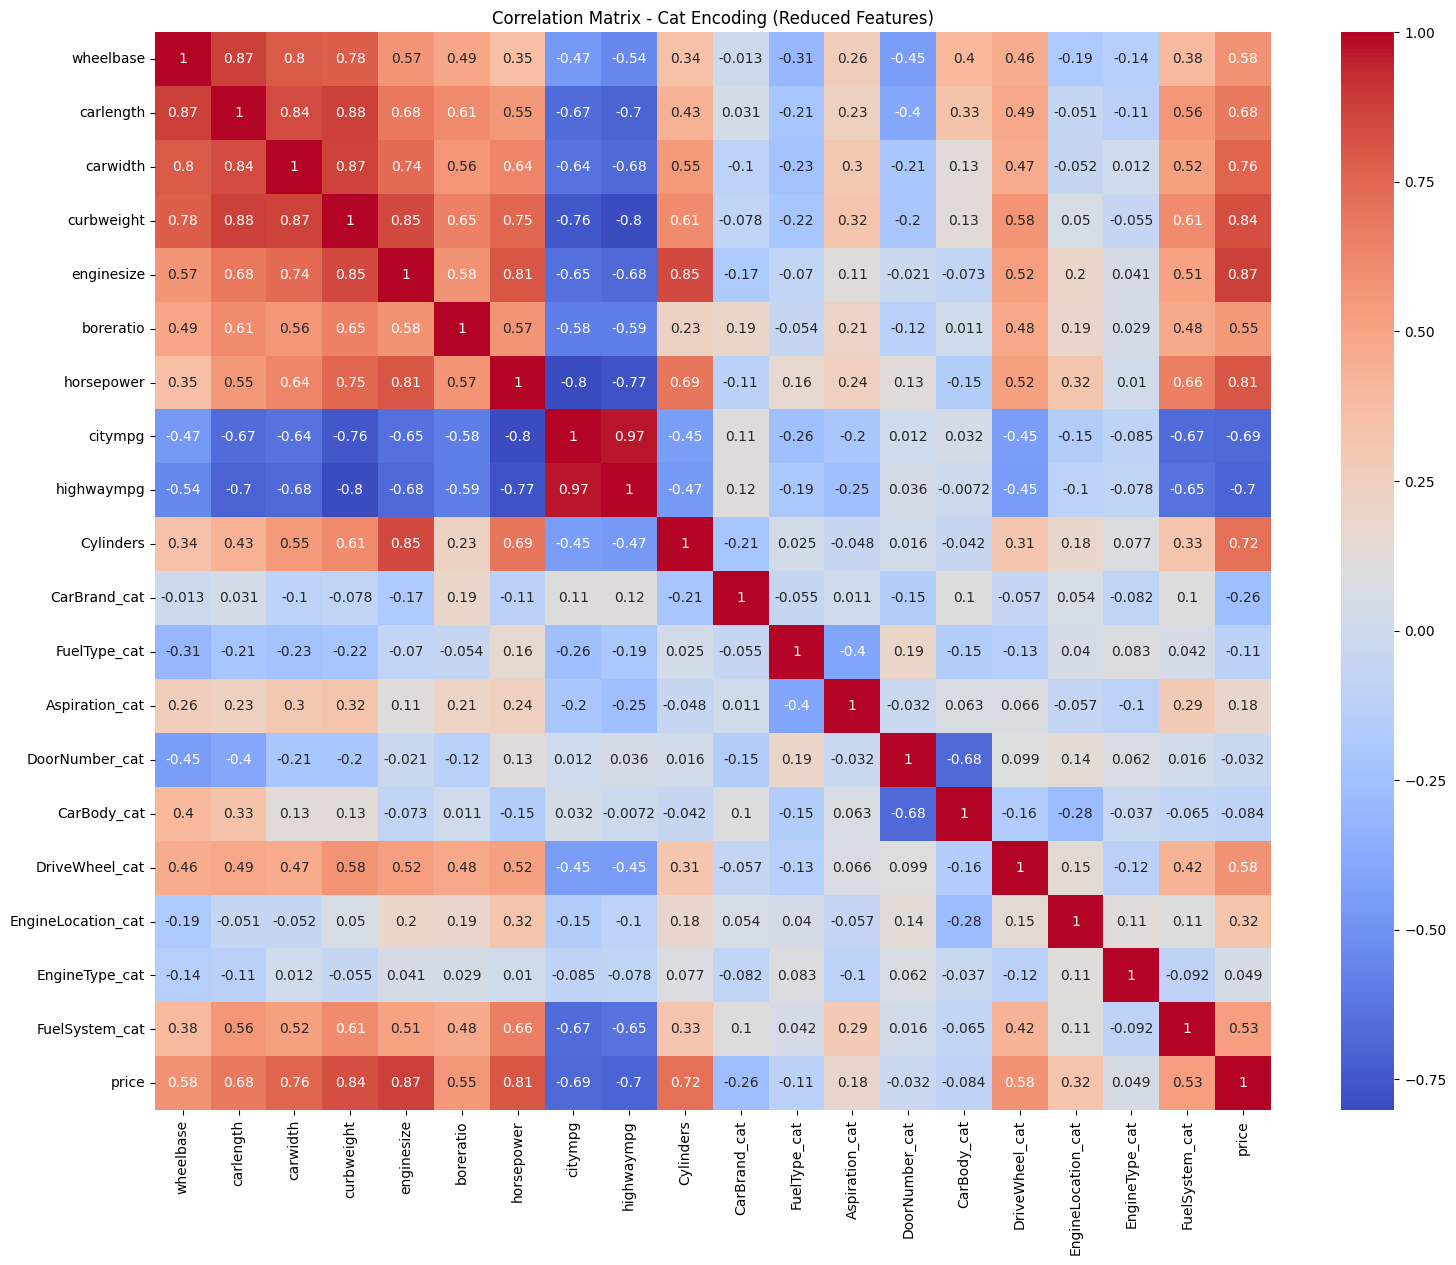

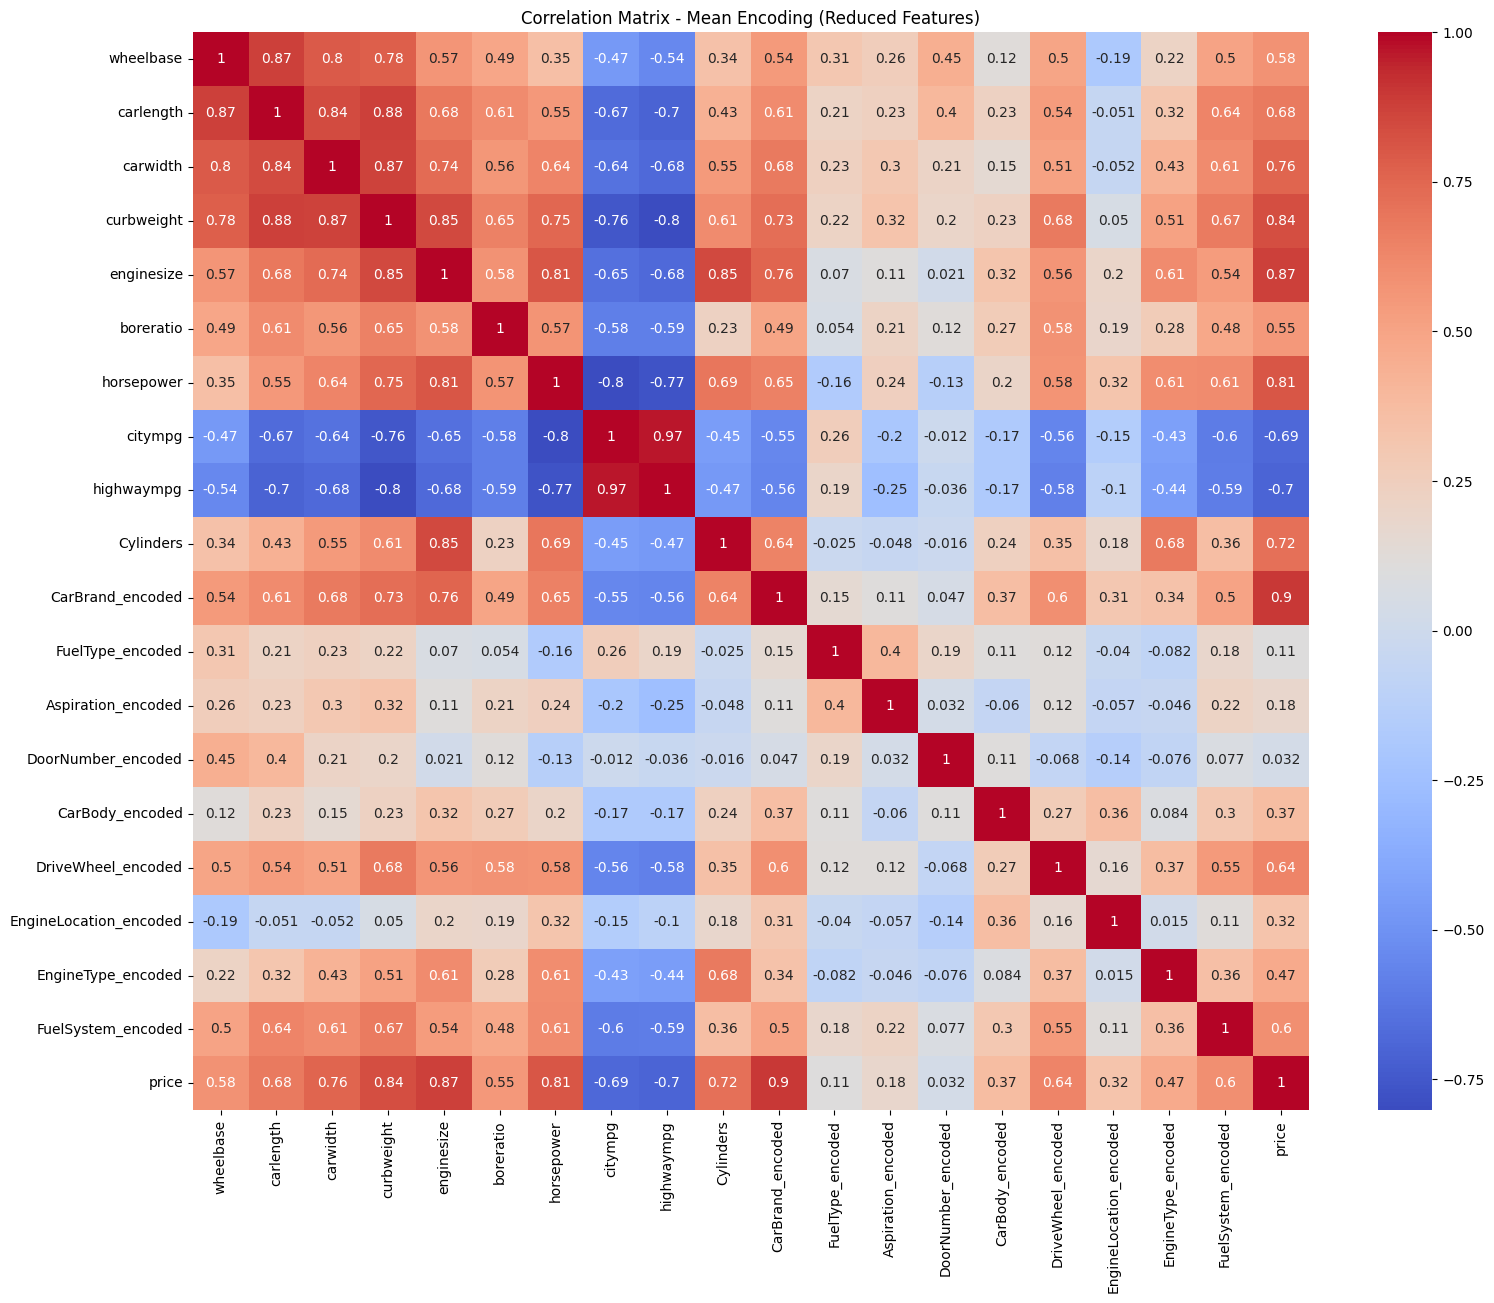

In [38]:
corr_cat = df[features_cat_reduced + ['price']].corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_cat, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Cat Encoding (Reduced Features)")
plt.show()

corr_enc = df[features_encoded_reduced + ['price']].corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_enc, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Mean Encoding (Reduced Features)")
plt.show()

In [39]:
exclude_weak_cat = [
    'CarBrand_cat', 'FuelType_cat', 'Aspiration_cat',
    'DoorNumber_cat', 'CarBody_cat', 'EngineLocation_cat', 'EngineType_cat'
]
exclude_weak_enc = [
    'FuelType_encoded', 'Aspiration_encoded',
    'DoorNumber_encoded', 'CarBody_encoded',
    'EngineLocation_encoded', 'EngineType_encoded'
]


🔹 Model 5: Strongly Correlated Features with Categorical Encoding


In [40]:
features_cat_strong = [col for col in features_cat_reduced if col not in exclude_weak_cat]
X_cat_strong = df[features_cat_strong]

X_train_cat_s, X_test_cat_s, y_train, y_test = train_test_split(X_cat_strong, y, test_size=0.2, random_state=42)

model_cat_s = LinearRegression()
model_cat_s.fit(X_train_cat_s, y_train)
y_pred_cat_s = model_cat_s.predict(X_test_cat_s)

results_dict['cat_encoding_strong'] = {
    'features': features_cat_strong,
    'r2_score': r2_score(y_test, y_pred_cat_s),
    'rmse': mean_squared_error(y_test, y_pred_cat_s, squared=False)
}


🔹 Model 6: Strongly Correlated Features with Mean Encoding


In [41]:
features_enc_strong = [col for col in features_encoded_reduced if col not in exclude_weak_enc]
X_enc_strong = df[features_enc_strong]

X_train_enc_s, X_test_enc_s, _, _ = train_test_split(X_enc_strong, y, test_size=0.2, random_state=42)

model_enc_s = LinearRegression()
model_enc_s.fit(X_train_enc_s, y_train)
y_pred_enc_s = model_enc_s.predict(X_test_enc_s)

results_dict['mean_encoding_strong'] = {
    'features': features_enc_strong,
    'r2_score': r2_score(y_test, y_pred_enc_s),
    'rmse': mean_squared_error(y_test, y_pred_enc_s, squared=False)
}


📊 7. Model Comparison and Evaluation

In [42]:
for key, value in results_dict.items():
    print(f"\nModel: {key}")
    print("R² Score:", round(value['r2_score'], 8))
    print("RMSE:", round(value['rmse'], 4))



Model: cat_encoding
R² Score: 0.85276063
RMSE: 3409.3501

Model: mean_encoding
R² Score: 0.8598311
RMSE: 3326.4841

Model: cat_encoding_reduced
R² Score: 0.84345468
RMSE: 3515.4398

Model: mean_encoding_reduced
R² Score: 0.85427836
RMSE: 3391.7329

Model: cat_encoding_strong
R² Score: 0.82996857
RMSE: 3663.7364

Model: mean_encoding_strong
R² Score: 0.8751799
RMSE: 3139.0764


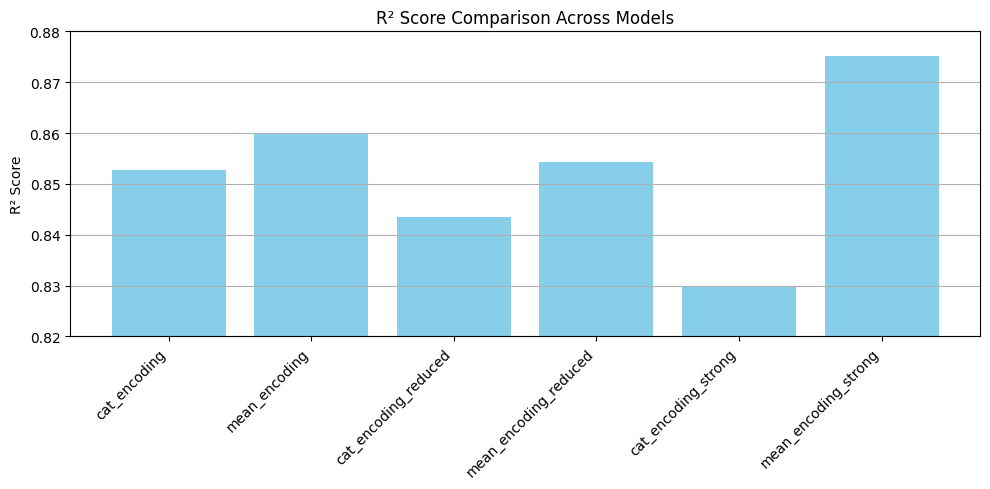

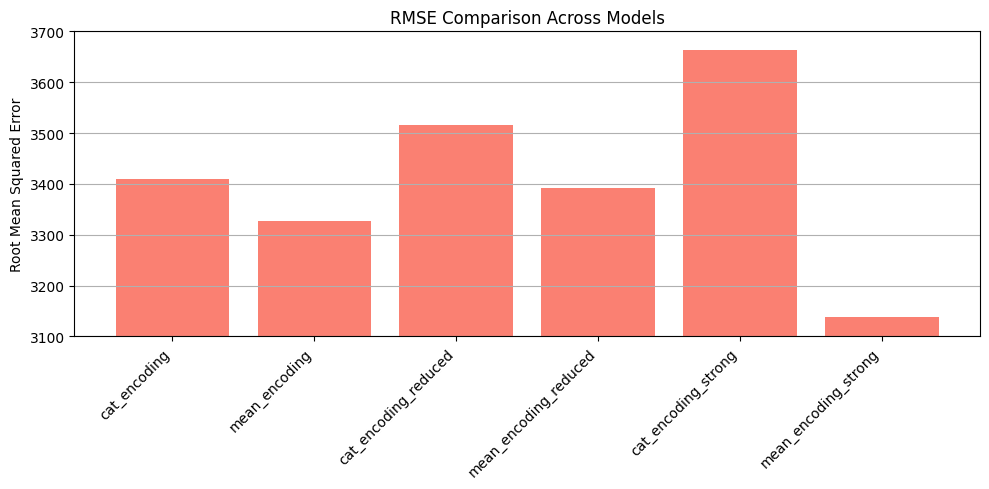

In [43]:
model_names = list(results_dict.keys())
r2_scores = [results_dict[m]['r2_score'] for m in model_names]
rmse_values = [results_dict[m]['rmse'] for m in model_names]

# Plot R² scores
plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_scores, color='skyblue')
plt.title('R² Score Comparison Across Models')
plt.ylabel('R² Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.82, 0.88)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot RMSE values
plt.figure(figsize=(10, 5))
plt.bar(model_names, rmse_values, color='salmon')
plt.title('RMSE Comparison Across Models')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45, ha='right')
plt.ylim(3100, 3700)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


📌 8. Conclusions and Observations
After building and evaluating six different linear regression models using various encoding strategies and feature selection techniques, the following conclusions were drawn:

🔍 Best Performing Model: mean_encoding_strong (Model 6)
R² Score: 0.8752
RMSE: 3139.08
This model used:
Mean encoding for categorical variables
Only features with a strong correlation to the target variable (|correlation| > 0.5)

📊 Baseline Model: cat_encoding (Model 1)
R² Score: 0.8528
RMSE: 3409.35
This model used:
Simple integer encoding
All available features without filtering

📈 Relative Improvement: Model 6 vs. Model 1
R² Score increased by ~2.63%
RMSE decreased by ~7.94%

✅ What Worked Well
Using mean encoding performed better than simple categorical (integer) encoding.
Filtering features based on correlation (keeping only those with strong linear relationship to the target) increased both accuracy and interpretability.
The most important predictors were: curbweight, enginesize, horsepower, carwidth, carlength, and cylinders.

🚫 What Didn’t Help Much
Removing features without correlation filtering (Models 3 & 4) had limited or negative impact.
Integer encoding struggled to capture meaningful distance between categorical levels.


